In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/restaurants-revenue-prediction/Restaurant_revenue (1).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/restaurants-revenue-prediction/Restaurant_revenue (1).csv')
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


## Understanding the Data (EDA)

In [4]:
df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

#### No missing values

In [5]:
df['Cuisine_Type'].value_counts()

Cuisine_Type
Japanese    262
American    256
Mexican     250
Italian     232
Name: count, dtype: int64

In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [8]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [9]:
df.duplicated().sum()

0

### Converting Cuisine_Type to Numerical Values

In [10]:
# Converting it to Cuisine_Type (Categorical) to Numerical feature

mapping = {'Japanese': 0, 'American': 1, 'Mexican': 2, 'Italian':3}
df['Cuisine_Type'] = df['Cuisine_Type'].map(mapping)

df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,0,36.236133,0,45,350.912040
1,24,40.020077,4.577892,3,17.952562,0,36,221.319091
2,81,41.981485,4.652911,0,22.600420,1,91,326.529763
3,70,43.005307,4.416053,3,18.984098,1,59,348.190573
4,30,17.456199,3.475052,3,12.766143,1,30,185.009121


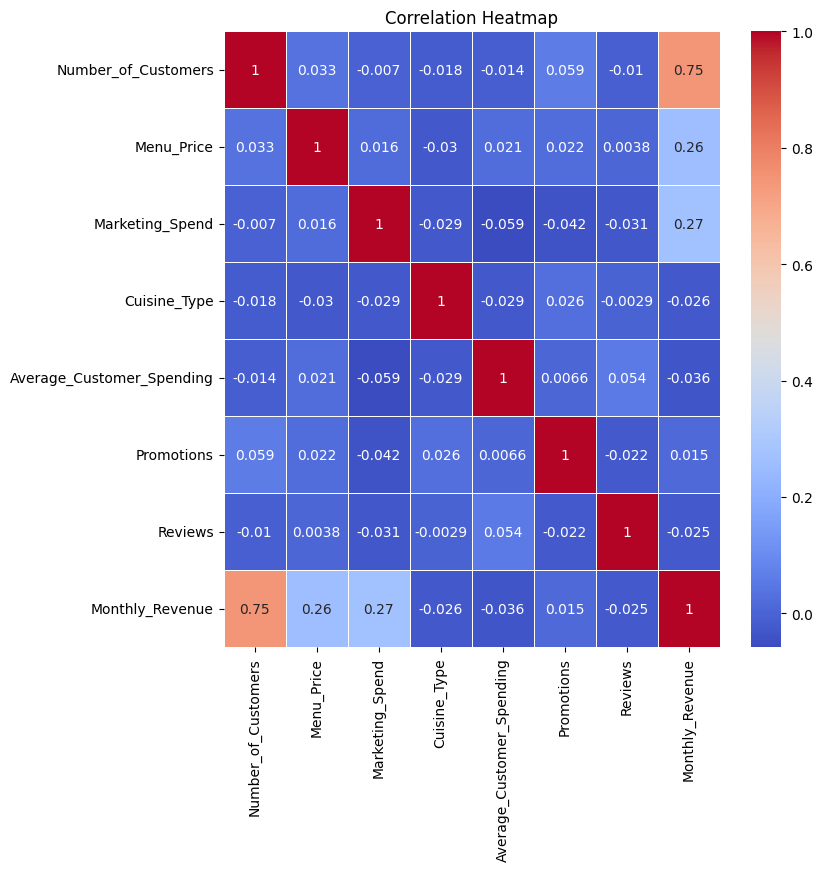

In [11]:
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

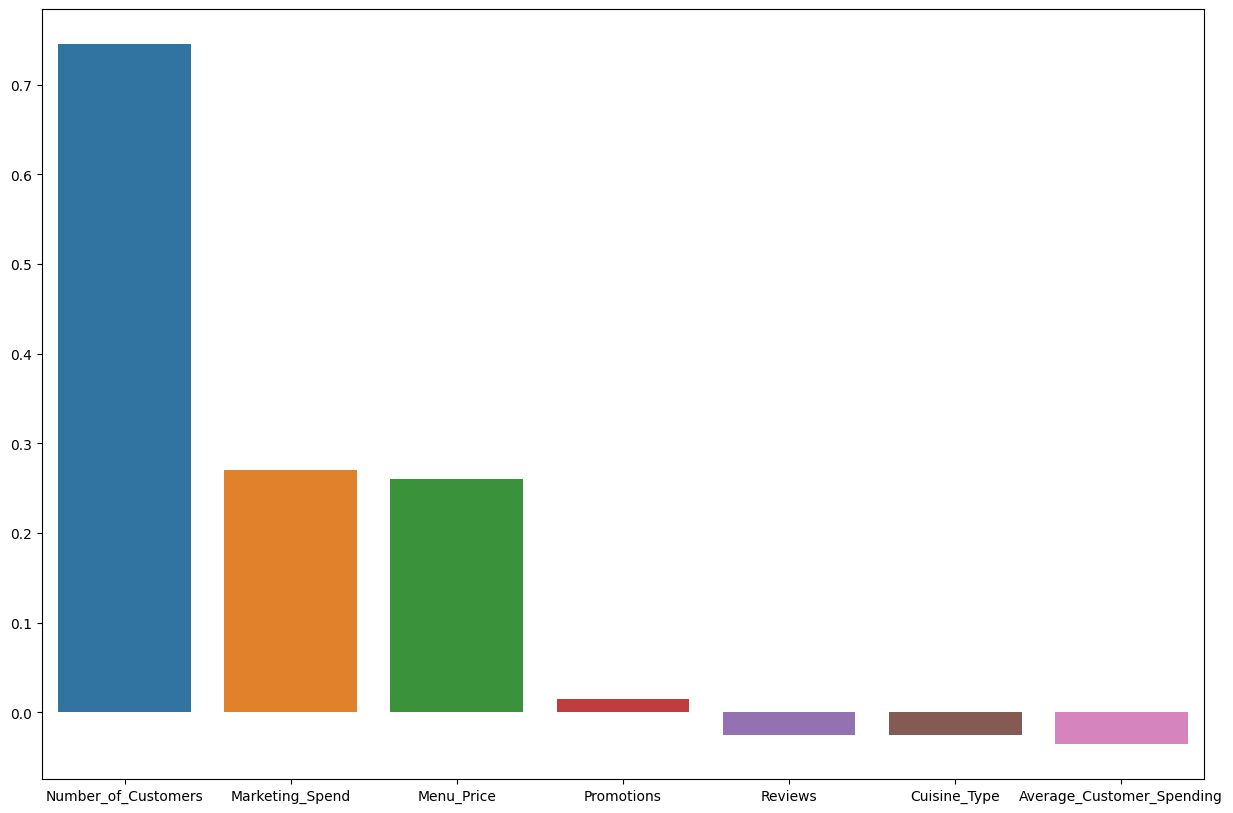

In [12]:
features = correlation_matrix['Monthly_Revenue'].sort_values(ascending=False)[1:]
plt.figure(figsize=(15,10))
sns.barplot(x=features.index,y=features.values)
plt.show()

### Insight:-
* Number_of_Customers Increases => Revenue Increases

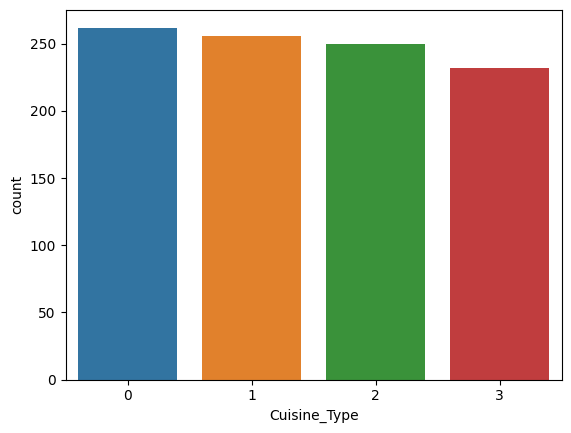

In [13]:
sns.countplot(x=df['Cuisine_Type'],data=df)
plt.show()

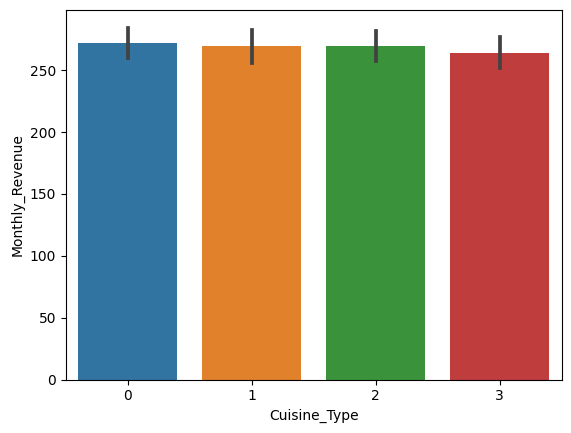

In [14]:
# Monthly Revenue with respect to each Cuisine_Type

sns.barplot(x='Cuisine_Type',y='Monthly_Revenue', data=df)
plt.show()

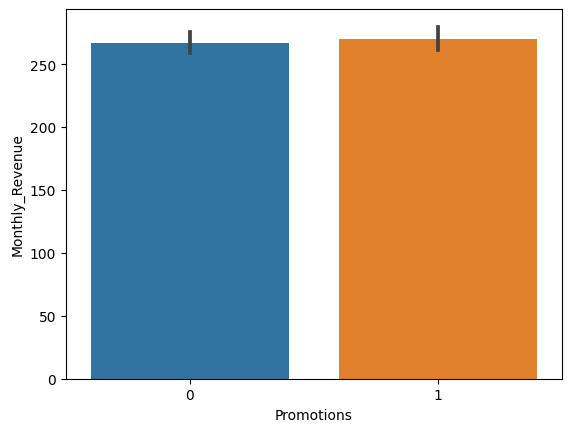

In [15]:
# Monthly Revenue with respect to Promotions

sns.barplot(x='Promotions',y='Monthly_Revenue', data=df)
plt.show()

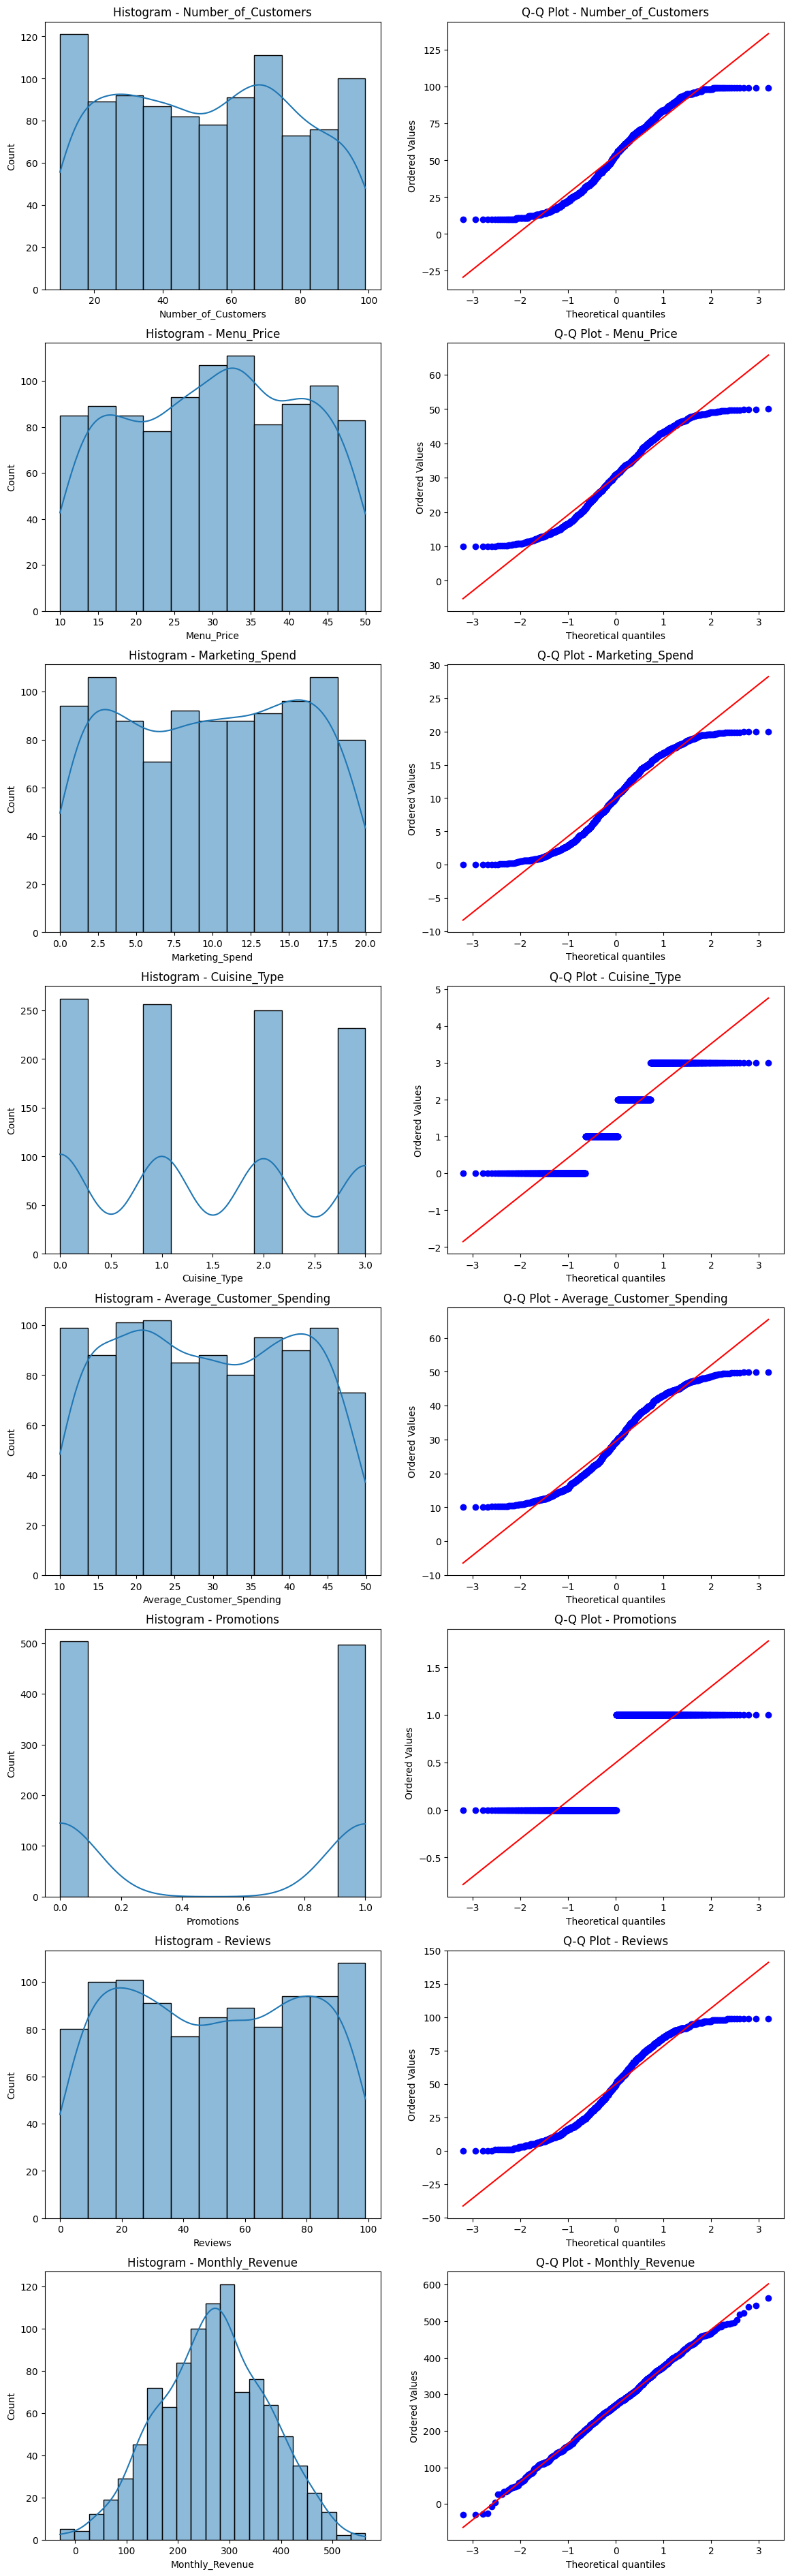

In [16]:
from scipy.stats import norm, probplot

features = df.columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(14, 6 * len(features)))

for i, feature in enumerate(features):
    # Plot histogram
    sns.histplot(df[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram - {feature}')

    # Probability plot (Q-Q plot)
    probplot(df[feature], plot=axes[i, 1], dist='norm', fit=True)
    axes[i, 1].set_title(f'Q-Q Plot - {feature}')

plt.show()

### Cuisine Type and Promotions need power transformation

In [17]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

### Train Test Split and Power Transformation (to make data normally distributed)

In [18]:
X = df.drop(columns=['Monthly_Revenue'])
y = df['Monthly_Revenue']

X.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews
0,61,43.117635,12.663793,0,36.236133,0,45
1,24,40.020077,4.577892,3,17.952562,0,36
2,81,41.981485,4.652911,0,22.600420,1,91
3,70,43.005307,4.416053,3,18.984098,1,59
4,30,17.456199,3.475052,3,12.766143,1,30


In [19]:
y

0      350.912040
1      221.319091
2      326.529763
3      348.190573
4      185.009121
          ...    
995    249.312034
996    110.228767
997    312.212552
998    272.482204
999    379.973072
Name: Monthly_Revenue, Length: 1000, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head(3)

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews
29,51,45.145165,1.292334,3,15.143859,0,96
535,22,27.329870,6.816314,1,30.723087,0,10
695,34,33.386828,6.264125,3,22.072375,1,77


In [21]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
pt = PowerTransformer()

In [22]:
X_train_tf = pt.fit_transform(X_train)
X_test_tf = pt.transform(X_test)

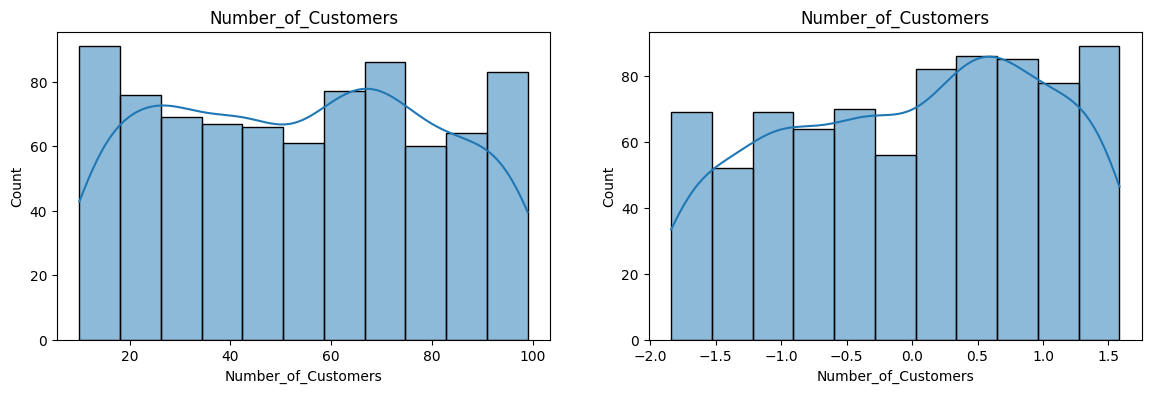

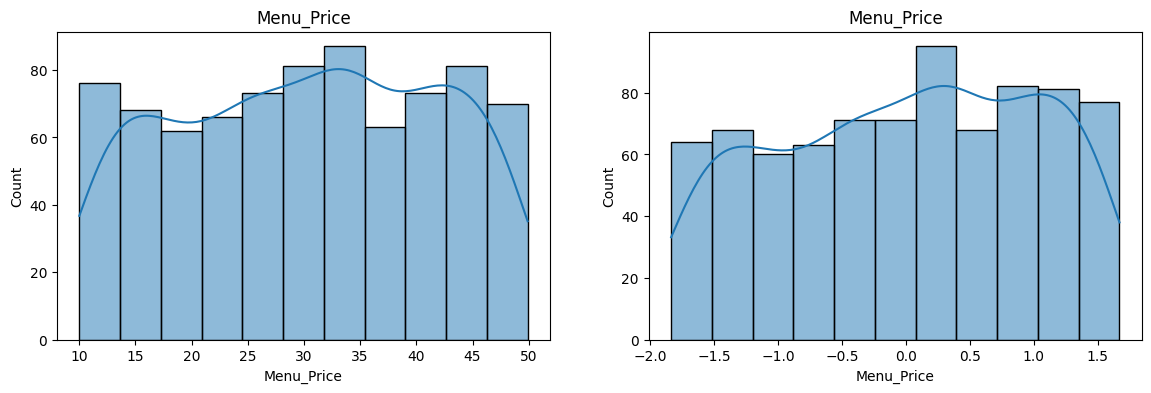

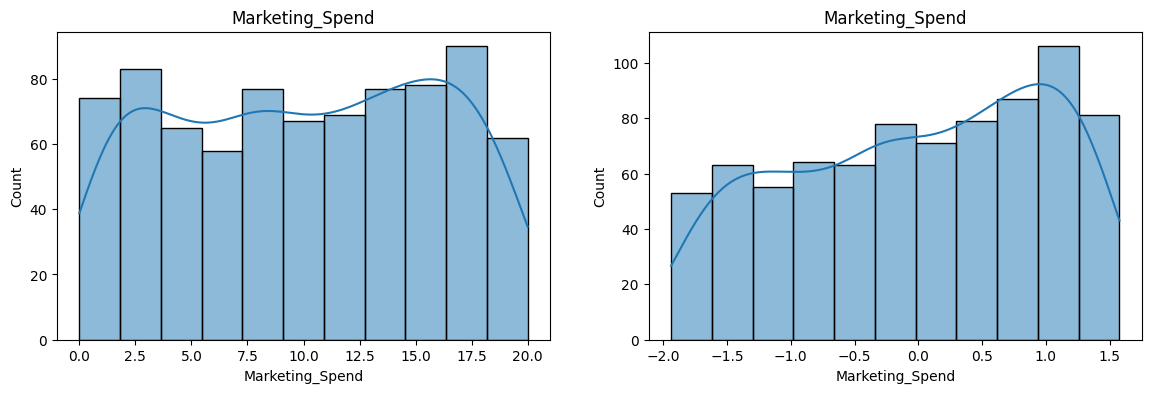

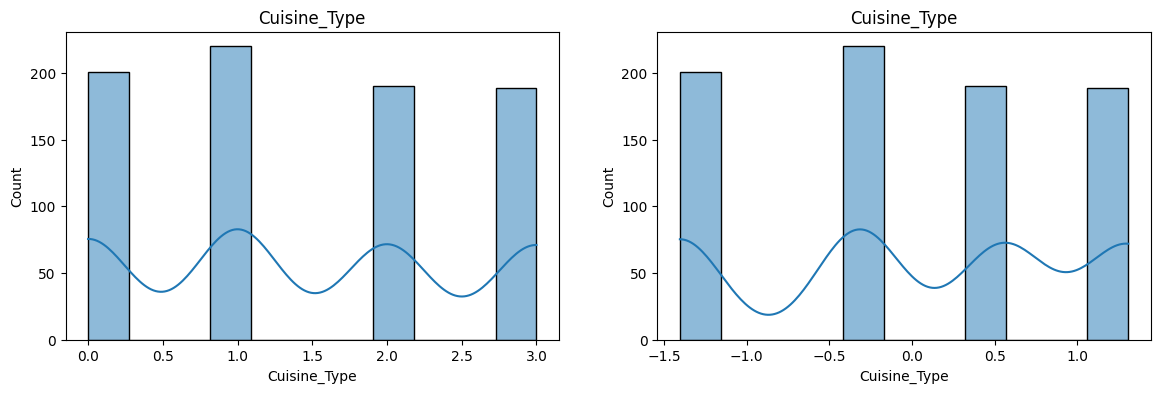

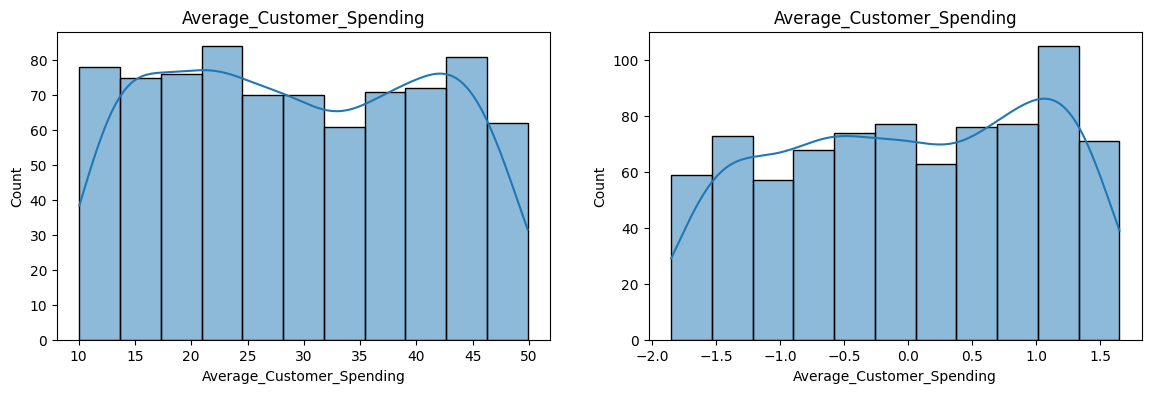

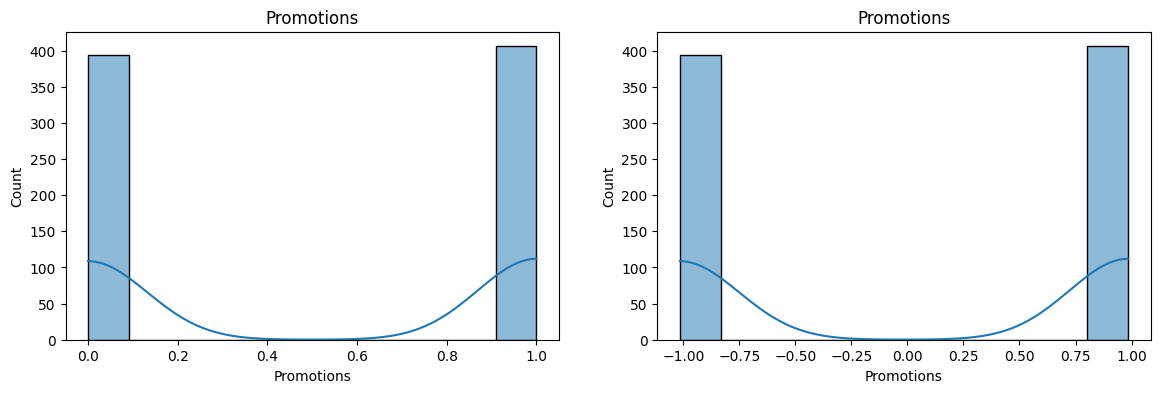

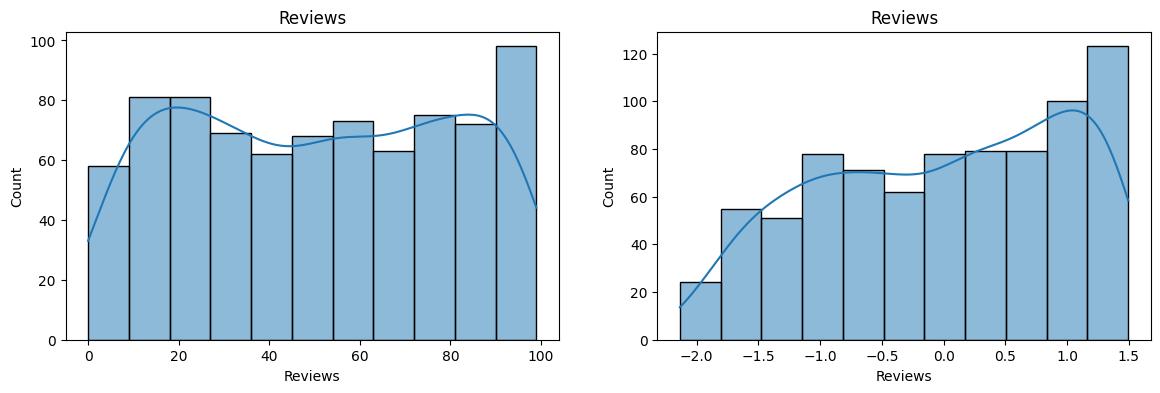

In [23]:
# Before and after comparision for Yeo-Johnson
X_train_tf = pd.DataFrame(X_train_tf,columns=X_train.columns)

for col in X_train_tf.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_tf[col],kde=True)
    plt.title(col)

    plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

### Linear Regression Base Model

In [25]:
# R2 Score without Power Transformer

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred1 = lr.predict(X_test)

r1 = r2_score(y_test,y_pred1)
r1

0.6732751077105462

In [26]:
# R2 Score with Power Transformer

lr = LinearRegression()
lr.fit(X_train_tf,y_train)

y_pred = lr.predict(X_test_tf)

r2 = r2_score(y_test,y_pred)
r2

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.6783103028486558

In [27]:
diff = r2-r1
print(f"Difference in R2 Scores => {diff}")

Difference in R2 Scores => 0.005035195138109572


# Building ML and DL Models

In [28]:
import optuna

from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import  log_loss

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

### XGBOOST Regressor

### Hyperparameter Optimization using Optuna

In [29]:
# def objective(trial):
#     params = {
#         "objective": "reg:squarederror",
#         "n_estimators": trial.suggest_int("n_estimators", 100, 250),
#         "max_depth": trial.suggest_int("max_depth", 3, 7),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
#         "gamma": trial.suggest_float("gamma", 0, 5),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#     }

#     model = XGBRegressor(**params)
#     scores = cross_val_score(model, X_train_tf, y_train, cv=5, scoring='r2')
#     mean_score = scores.mean()

#     return mean_score

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=150)  # Adjust n_trials as needed

# best_params = study.best_params
# print("Best parameters:", best_params)

In [30]:
xgb_params = {'n_estimators': 201, 'max_depth': 3, 'learning_rate': 0.023175870767365846, 'gamma': 0.9584815897882999, 'subsample': 0.5495139638090536, 'colsample_bytree': 0.9687490311465563}

In [31]:
xgb_model = XGBRegressor(**xgb_params)

xgb_model.fit(X_train_tf,y_train)

y_pred_xg = xgb_model.predict(X_test_tf)

print("R2 Score => ",r2_score(y_test,y_pred_xg))

R2 Score =>  0.6534020677045955


### LGBM Regressor Model

In [32]:
# def objective(trial):
#     params = {
#         "objective": "regression",
#         "num_leaves": trial.suggest_int("num_leaves", 20, 100),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
#         "n_estimators": trial.suggest_int("n_estimators", 100, 250),
#         "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
#         "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
#     }

#     model = LGBMRegressor(**params)
#     scores = cross_val_score(model, X_train_tf, y_train, cv=5, scoring='r2')
#     mean_score = scores.mean()

#     return mean_score

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=150)  # Adjust n_trials as needed

# best_params = study.best_params
# print("Best parameters:", best_params)

In [33]:
lgbm_params = {'num_leaves': 100, 'learning_rate': 0.013304276286241134, 'n_estimators': 172, 'bagging_fraction': 0.5911535557529651, 'feature_fraction': 0.7730602571306673}

In [34]:
lgbm_model = LGBMRegressor(**xgb_params)

lgbm_model.fit(X_train_tf,y_train)

y_pred_lg = lgbm_model.predict(X_test_tf)

print("R2 Score => ",r2_score(y_test,y_pred_xg))

[LightGBM] [Warning] Unknown parameter: gamma
R2 Score =>  0.6534020677045955


### ANN 

In [35]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

num_features = len(X_train.columns)
print(f"Number of input features: {num_features}")

Number of input features: 7


In [36]:
model = Sequential()

model.add(Dense(24,activation='relu',input_dim=7))
model.add(Dropout(0.2))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(5,activation='relu'))

model.add(Dense(3,activation='relu'))

model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                192       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 5

In [37]:
model.compile(loss='mean_squared_error',optimizer='Adam')
model.fit(X_train_tf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 2s 16ms/step - loss: 84081.5938 - val_loss: 84335.2266
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 83832.5781 - val_loss: 84123.5781
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 83527.9531 - val_loss: 83749.4688
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 82953.2734 - val_loss: 82931.4531
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 81656.7812 - val_loss: 81167.0859
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 78987.7422 - val_loss: 77655.4609
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 73930.8125 - val_loss: 71327.2266
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 65307.0117 - val_loss: 60749.3633
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 52278.4180 - val_loss: 45314.7383
Epoch 10/100
20/20 [================

In [38]:
y_pred_ann = model.predict(X_test_tf)
r2_score(y_test,y_pred_ann)

7/7 [==============================] - 0s 2ms/step


0.6200035268726882

### Gradient Boosting Regressor 

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

# def objective(trial):
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 100, 300),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
#         "max_depth": trial.suggest_int("max_depth", 3, 7),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#     }

#     model = GradientBoostingRegressor(**params)
#     scores = cross_val_score(model, X_train_tf, y_train, cv=5, scoring='r2')
#     mean_score = scores.mean()

#     return mean_score

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=120)  # Adjust n_trials as needed

# best_params = study.best_params
# print("Best parameters:", best_params)

In [40]:
gb_params = {'n_estimators': 231, 'learning_rate': 0.016826781149811704, 'max_depth': 3, 'subsample': 0.8084391194976213}

In [41]:
GB = GradientBoostingRegressor(**gb_params)
GB.fit(X_train_tf,y_train)

y_pred_gb = GB.predict(X_test_tf)

r2_score(y_test,y_pred_gb)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


0.6547040051014619

### Stacking Regressor (GradientBoostingRegressor + XGBoostRegressor)

In [42]:
from sklearn.ensemble import StackingRegressor

# Create base models
base_models = [
    ("gbr", GB),
    ("xgb", xgb_model)
]

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the stacking regressor to the entire training set
stacking_regressor.fit(X_train_tf, y_train)

# Make predictions on new data
y_pred_stacked = stacking_regressor.predict(X_test_tf)
r2_score(y_test,y_pred_stacked)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


0.6482487085341342